In [1]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
insp_data = pd.read_csv("https://data.cityofnewyork.us/api/views/xx67-kt59/rows.csv?accessType=DOWNLOAD")
insp_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50039173,El Jalapeno,BRONX,800,E 149TH ST,10455,3475906989,Mexican,03/11/2016,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,13.0,A,03/11/2016,10/26/2016,Cycle Inspection / Initial Inspection
1,41373712,TALENT THAI KITCHEN,MANHATTAN,210,EAST 34 STREET,10016,2127258888,Thai,11/20/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,9.0,A,11/20/2015,10/26/2016,Cycle Inspection / Initial Inspection
2,41559999,DARKHORSE,MANHATTAN,17,MURRAY STREET,10007,2126083900,American,05/20/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13.0,A,05/20/2016,10/26/2016,Cycle Inspection / Initial Inspection
3,41488065,BOCA CHICA QUEENS,QUEENS,9620,37 AVENUE,11368,3472422226,"Latin (Cuban, Dominican, Puerto Rican, South &...",05/14/2013,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,05/14/2013,10/26/2016,Cycle Inspection / Initial Inspection
4,41626109,ALLSWELL,BROOKLYN,124,BEDFORD AVENUE,11249,3477992743,American,01/16/2014,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,24.0,B,01/16/2014,10/26/2016,Cycle Inspection / Re-inspection


In [3]:
insp_data.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [4]:
i_data1 = insp_data[['BORO','CUISINE DESCRIPTION','CRITICAL FLAG']]
i_data1.sort(['BORO']).head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,BORO,CUISINE DESCRIPTION,CRITICAL FLAG
0,BRONX,Mexican,Critical
393241,BRONX,Chinese,Not Critical
52180,BRONX,Chinese,Not Critical
393238,BRONX,Caribbean,Not Critical
292984,BRONX,Pizza,Critical


In [5]:
i_data2 = i_data1[~i_data1['CRITICAL FLAG'].str.contains("Not Critical")]
i_data2.head()

# BORO > COUNT OF CUISINE TYPES THAT ARE ALL CRITICAL

# rpt[rpt['STK_ID'].str.contains('|'.join(endstrings)]

,BORO,CUISINE DESCRIPTION,CRITICAL FLAG
0,BRONX,Mexican,Critical
2,MANHATTAN,American,Critical
4,BROOKLYN,American,Critical
5,BROOKLYN,American,Critical
8,MANHATTAN,Italian,Critical


In [6]:
i_data2['MEX_CNT'] = ''
i_data2['MEX_CNT'][i_data2['CUISINE DESCRIPTION'].str.contains("Mexican")] = 1 
i_data2['MEX_CNT'][~i_data2['CUISINE DESCRIPTION'].str.contains("Mexican")] = 0

i_data2['AM_CNT'] = ''
i_data2['AM_CNT'][i_data2['CUISINE DESCRIPTION'].str.contains("American")] = 1 
i_data2['AM_CNT'][~i_data2['CUISINE DESCRIPTION'].str.contains("American")] = 0

i_data2['ITL_CNT'] = ''
i_data2['ITL_CNT'][i_data2['CUISINE DESCRIPTION'].str.contains("Italian")] = 1 
i_data2['ITL_CNT'][~i_data2['CUISINE DESCRIPTION'].str.contains("Italian")] = 0

i_data2['TOT_CNT'] = ''
i_data2['TOT_CNT'] = 1 

i_data2.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

,BORO,CUISINE DESCRIPTION,CRITICAL FLAG,MEX_CNT,AM_CNT,ITL_CNT,TOT_CNT
0,BRONX,Mexican,Critical,1,0,0,1
2,MANHATTAN,American,Critical,0,1,0,1
4,BROOKLYN,American,Critical,0,1,0,1
5,BROOKLYN,American,Critical,0,1,0,1
8,MANHATTAN,Italian,Critical,0,0,1,1


In [7]:
# i_data3 = i_data2.groupby(i_data2['BORO']).count()
i_data3 = []
i_data3 = i_data2[~i_data2['BORO'].str.contains("Missing")]
i_data3.head()
i_data3 = i_data3[['BORO','MEX_CNT','AM_CNT','ITL_CNT']]
i_data3.sort(['BORO']).head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,BORO,MEX_CNT,AM_CNT,ITL_CNT
0,BRONX,1,0,0
98054,BRONX,0,0,0
98068,BRONX,0,1,0
98083,BRONX,0,0,0
98085,BRONX,0,1,0


In [27]:
i_data_s = i_data3.groupby(i_data3['BORO']).sum()
i_data_s['TOT_CNT'] = ''
i_data_s['TOT_CNT'] = i_data_s['MEX_CNT'] + i_data_s['AM_CNT'] + i_data_s['ITL_CNT']
i_data_s

,MEX_CNT,AM_CNT,ITL_CNT,TOT_CNT
BORO,,,,
BRONX,1173,5920,1318,8411
BROOKLYN,2848,13862,3441,20151
MANHATTAN,3199,32880,7999,44078
QUEENS,1843,13865,2681,18389
STATEN ISLAND,367,2357,1558,4282


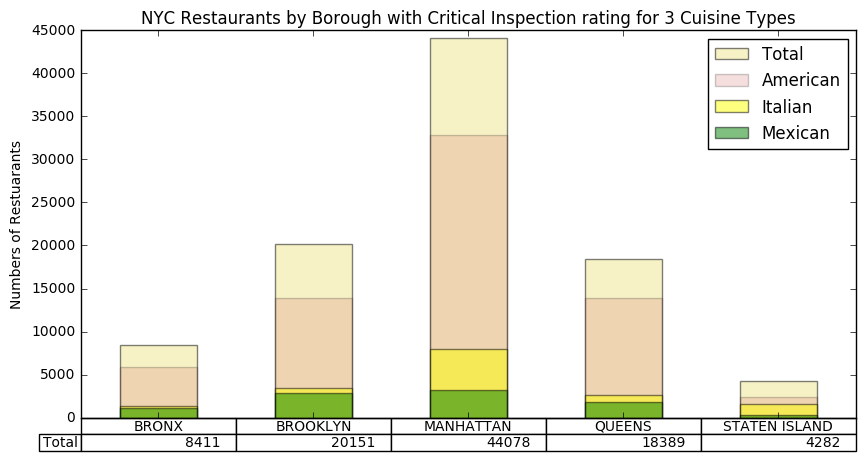

In [36]:
fig = pl.figure(figsize(10,5))

ax = i_data_s['TOT_CNT'].plot(kind="bar",color='khaki', alpha=0.5, label='Total', table=True)
ax = i_data_s['AM_CNT'].plot(kind="bar",color='IndianRed', alpha=0.2,label='American')
ax = i_data_s['ITL_CNT'].plot(kind="bar",color='Yellow', alpha=0.5,label='Italian')
ax = i_data_s['MEX_CNT'].plot(kind="bar",color='green', alpha=0.5,label='Mexican')

# i_data_s = i_data_s.groupby(['Site Name', 'Abuse/NFF'])['Site Name'].count().unstack('Abuse/NFF').fillna(0)
# test5.plot(kind='bar', stacked=True)

# pl.xticks(i_data_s.index)
#ax = sumboro.plot(kind = 'bar',table = True)
#ax = sumboro['NUMBER OF MOTORIST INJURED'].hist()
#sumboro1.plot(kind = 'bar', color='firebrick' ,stacked = True)
tmp = ax.xaxis.set_ticklabels(['         ', '', '          ', '', ''], fontsize=10)
ax.set_title('NYC Restaurants by Borough with Critical Inspection rating for 3 Cuisine Types')
ax.set_ylabel ("Numbers of Restuarants")
ax.set_xlabel (" ")
pl.legend()

## Figure 1: New York City Restaurants with Critical Inspection rating for 3 Cuisine Types           (Inspection data for 22-Aug-2014)

### As seen in the above stacked bar plot for the 5 boroughts of New York City, the restaurants for 3 cuisine types with critical ratings is seen. The cuisine types part of this analysis are American, Italian, and Mexican. This analysis shows the proportion of restaurants inspected as CRITICAL and their locations. 